In [1]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('COVID-19_geo_timeseries_ver_0311.csv')

# Display the first few rows to understand the structure
data.head()

Saving COVID-19_geo_timeseries_ver_0311.csv to COVID-19_geo_timeseries_ver_0311.csv


,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,data_source,country_code,region,country_flag
0,Hubei,China,35.86166,104.195397,729,39.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
1,Guangdong,China,35.86166,104.195397,53,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
2,Zhejiang,China,35.86166,104.195397,43,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
3,Beijing,China,35.86166,104.195397,36,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
4,Chongqing,China,35.86166,104.195397,27,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png


# Data Cleaning
Data cleaning, often considered the least glamorous, but most time-consuming aspect of data science, is a crucial step in the EDA process. The quality of data and the usefulness of the results drawn from it directly depend on how clean the data is.

# Steps in Data Cleaning:
1. **Handling Missing Values:**

Definition: Identify and address missing or null values.
Methods:
Deletion: Removing rows or columns with missing values. This is often used when the volume of missing data is small.
Imputation: Filling in missing values based on other observations or domain knowledge. Common methods include filling with mean, median, mode, or using predictive models.
In our context: Check columns like confirmed_cases, deaths, recovered, etc., for any missing values and decide on an appropriate strategy.

2. **Detecting and Treating Outliers:**

Definition: Outliers are data points that differ significantly from other observations. They can distort predictions and affect accuracy.
Methods:
Visualization: Using box plots, scatter plots, and histograms.
Statistical Methods: Z-score, IQR (Interquartile Range).
Truncation or Capping: Limiting the outlier values to a certain threshold.
In our context: Investigate columns with continuous data, such as confirmed_cases, for potential outliers.
3. **Ensuring Data Consistency:**

Definition: Data should be consistent, meaning that structural or semantic patterns should be uniform.
Methods:
Standardization: Using a consistent format for data entries.
Error Checking: Using automated rules or algorithms.
In our context: Ensure that country names, region names, etc., follow a consistent pattern.
4. **Handling Duplicates:**

Definition: Duplicate rows or records can bias analysis.
Methods: Identify and remove duplicates.
In our context: Check the dataset for any duplicate entries based on a combination of columns like update_time, country, and province.

In [2]:
covid_data = data

# Checking the shape of the dataset (rows, columns)
dataset_shape = covid_data.shape

# Checking the data types of each column
data_types = covid_data.dtypes

# Checking for missing values in each column
missing_values = covid_data.isnull().sum()

dataset_shape, data_types, missing_values


((24791, 12),
 province            object
 country             object
 latitude           float64
 longitude          float64
 confirmed_cases      int64
 deaths             float64
 recovered          float64
 update_time         object
 data_source         object
 country_code        object
 region              object
 country_flag        object
 dtype: object,
 province            2308
 country                0
 latitude              93
 longitude             93
 confirmed_cases        0
 deaths                 6
 recovered          19856
 update_time            0
 data_source            0
 country_code          69
 region                69
 country_flag          69
 dtype: int64)

In [3]:
# Summary statistics for the numerical columns
numerical_summary = covid_data.describe()

numerical_summary


,latitude,longitude,confirmed_cases,deaths,recovered
count,24698.000000,24698.000000,24791.000000,24785.000000,4935.00000
mean,34.902915,89.982701,506.282038,12.104095,201.01155
std,9.030786,47.900761,3203.578500,111.383410,2179.79852
min,-40.900557,-106.346771,0.000000,0.000000,0.00000
25%,35.861660,104.195397,8.000000,0.000000,0.00000
50%,35.861660,104.195397,50.000000,0.000000,1.00000
75%,35.861660,104.195397,202.000000,1.000000,14.00000
max,64.963051,174.885971,67773.000000,3046.000000,49134.00000


In [4]:
# Impute missing values for 'recovered' and 'deaths' with 0
covid_data['recovered'].fillna(0, inplace=True)
covid_data['deaths'].fillna(0, inplace=True)

# Impute missing values for 'province' with 'Unknown'
covid_data['province'].fillna('Unknown', inplace=True)

# Check for missing values after the initial imputations
remaining_missing_values = covid_data.isnull().sum()

remaining_missing_values


province            0
country             0
latitude           93
longitude          93
confirmed_cases     0
deaths              0
recovered           0
update_time         0
data_source         0
country_code       69
region             69
country_flag       69
dtype: int64

In [5]:
# Impute missing values in 'latitude' and 'longitude' based on median values of the respective countries
covid_data['latitude'] = covid_data.groupby('country')['latitude'].transform(lambda x: x.fillna(x.median()))
covid_data['longitude'] = covid_data.groupby('country')['longitude'].transform(lambda x: x.fillna(x.median()))

# Check for missing values after imputing 'latitude' and 'longitude'
remaining_missing_values_after_lat_long = covid_data.isnull().sum()

remaining_missing_values_after_lat_long


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

province            0
country             0
latitude           91
longitude          91
confirmed_cases     0
deaths              0
recovered           0
update_time         0
data_source         0
country_code       69
region             69
country_flag       69
dtype: int64

In [6]:
# Remove rows with missing latitude and longitude
covid_data.dropna(subset=['latitude', 'longitude'], inplace=True)

# Impute missing values in 'country_code', 'region', and 'country_flag' with 'Unknown'
columns_to_impute = ['country_code', 'region', 'country_flag']
for column in columns_to_impute:
    covid_data[column].fillna('Unknown', inplace=True)

# Check for any remaining missing values
final_missing_values = covid_data.isnull().sum()

final_missing_values


province           0
country            0
latitude           0
longitude          0
confirmed_cases    0
deaths             0
recovered          0
update_time        0
data_source        0
country_code       0
region             0
country_flag       0
dtype: int64

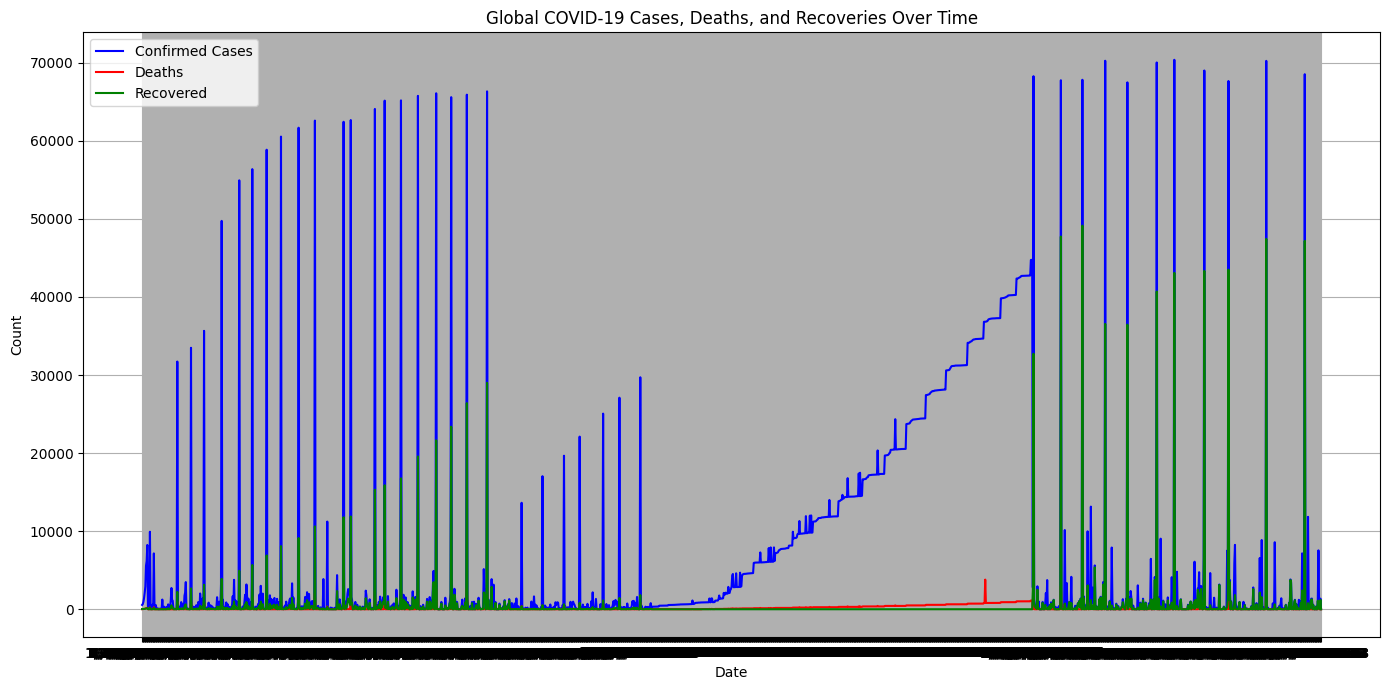

In [10]:
# Grouping by 'update_time' and summing the cases, deaths, and recoveries for the reloaded data
time_series_data_reload = covid_data.groupby('update_time').agg({
    'confirmed_cases': 'sum',
    'deaths': 'sum',
    'recovered': 'sum'
}).sort_index()

import matplotlib.pyplot as plt

# Plotting the time series data for the reloaded dataset
plt.figure(figsize=(14, 7))
plt.plot(time_series_data_reload.index, time_series_data_reload['confirmed_cases'], label='Confirmed Cases', color='blue')
plt.plot(time_series_data_reload.index, time_series_data_reload['deaths'], label='Deaths', color='red')
plt.plot(time_series_data_reload.index, time_series_data_reload['recovered'], label='Recovered', color='green')
plt.title('Global COVID-19 Cases, Deaths, and Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


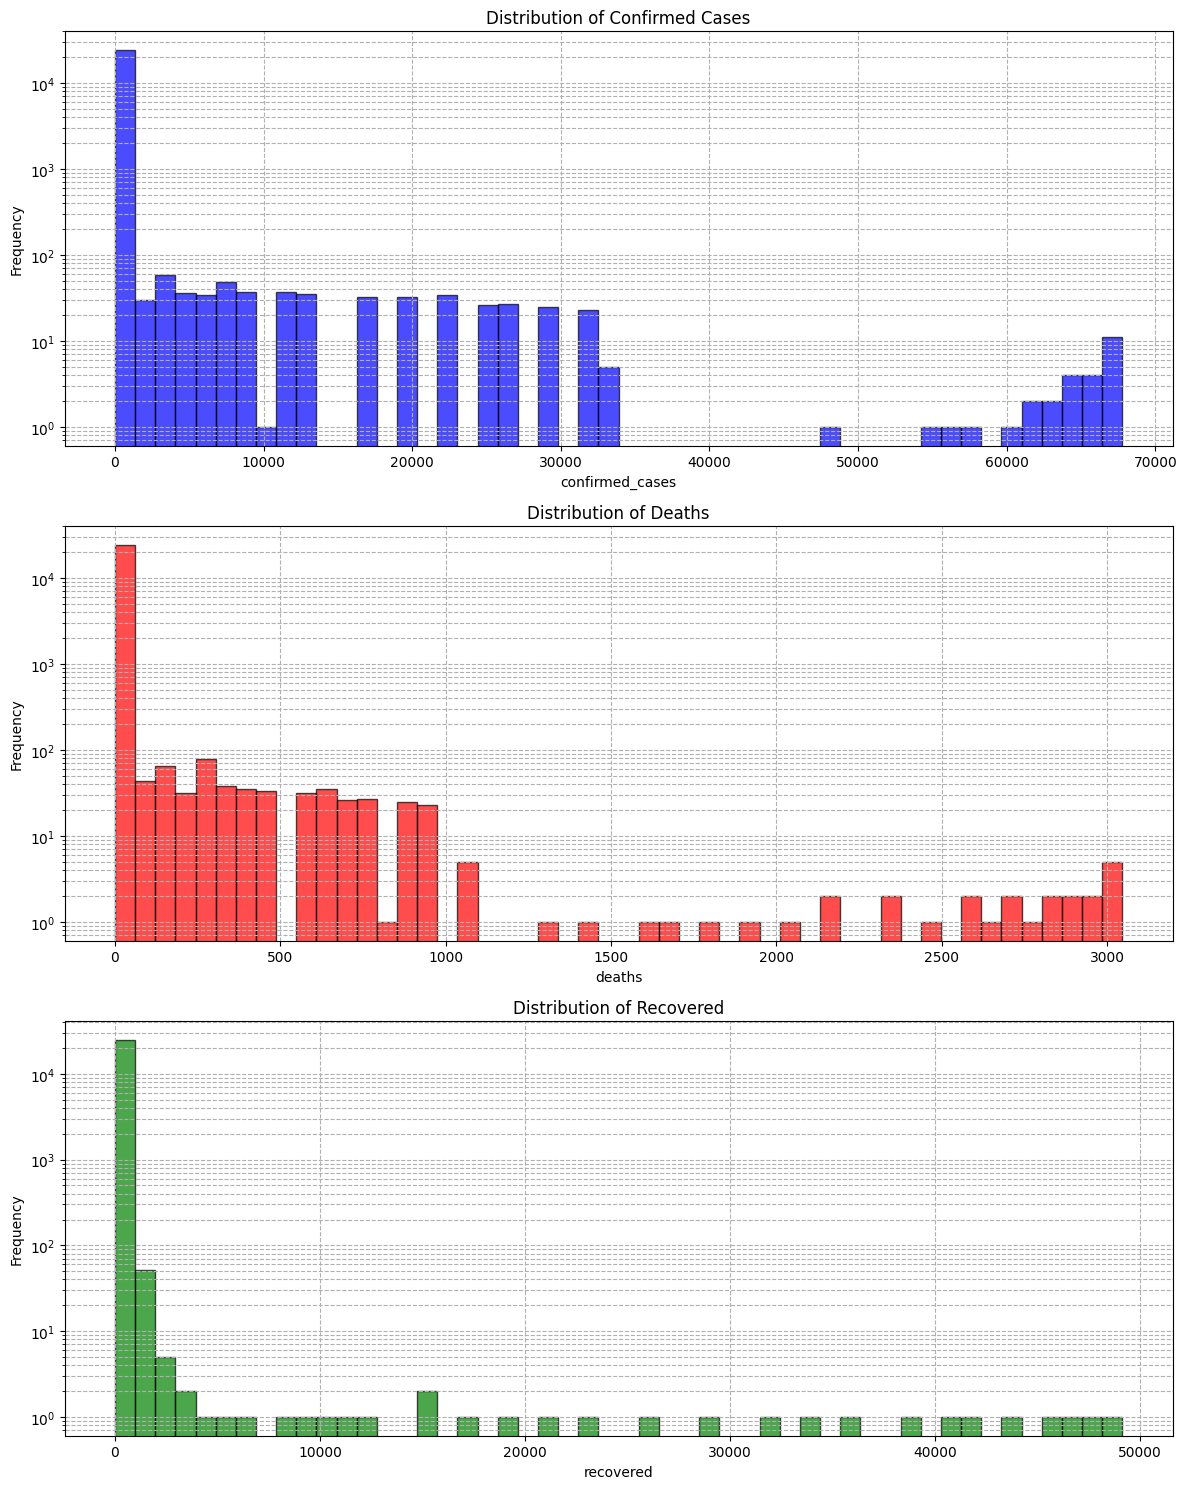

In [13]:
# Setting up the figure and axes
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

# Plotting histograms for 'confirmed_cases', 'deaths', and 'recovered'
columns_to_plot = ['confirmed_cases', 'deaths', 'recovered']
colors = ['blue', 'red', 'green']
titles = ['Distribution of Confirmed Cases', 'Distribution of Deaths', 'Distribution of Recovered']

for i, column in enumerate(columns_to_plot):
    axs[i].hist(covid_data[column], bins=50, color=colors[i], edgecolor='black', alpha=0.7)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].set_yscale('log')  # Setting y-axis to logarithmic scale for better visualization
    axs[i].grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()


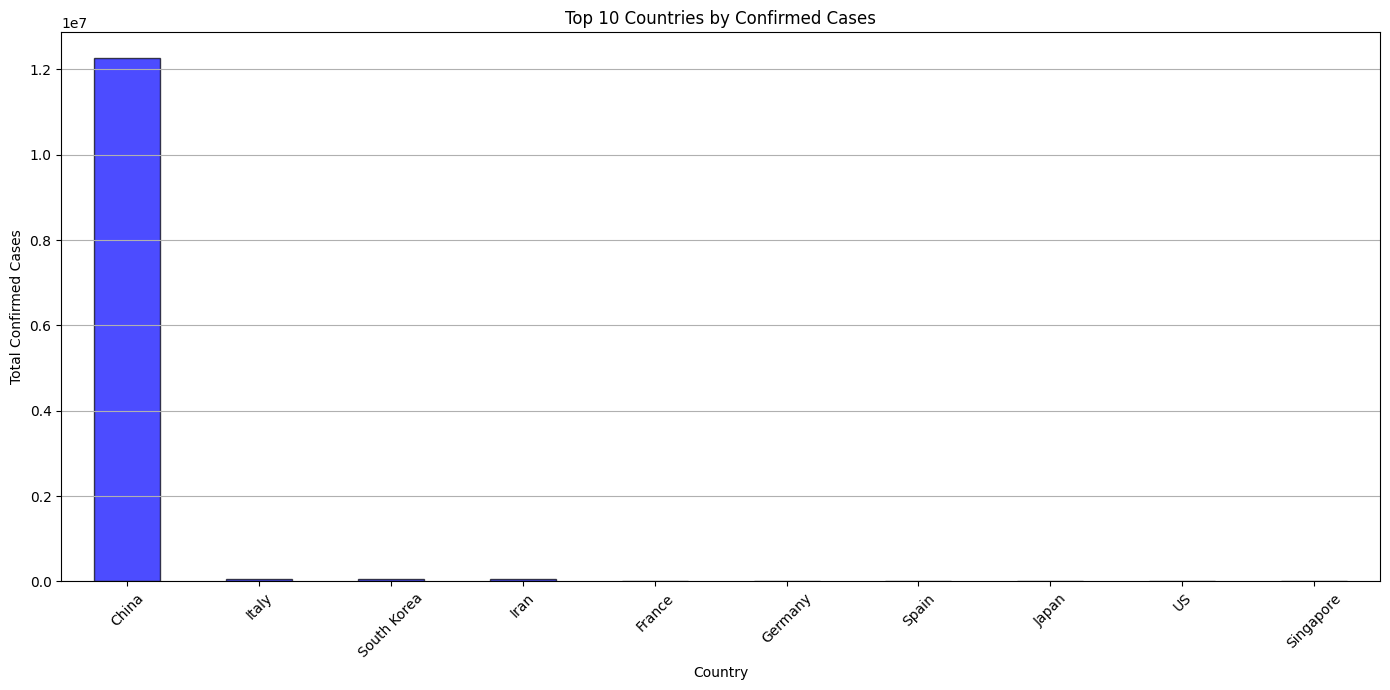

In [15]:
# Grouping by 'country' and summing the cases, deaths, and recoveries
country_data = covid_data.groupby('country').agg({
    'confirmed_cases': 'sum',
    'deaths': 'sum',
    'recovered': 'sum'
}).sort_values(by='confirmed_cases', ascending=False)

# Taking the top 10 countries based on confirmed cases
top_countries_confirmed = country_data.head(10)

# Plotting bar plot for top countries based on confirmed cases
plt.figure(figsize=(14, 7))
top_countries_confirmed['confirmed_cases'].plot(kind='bar', color='blue', edgecolor='black', alpha=0.7)
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


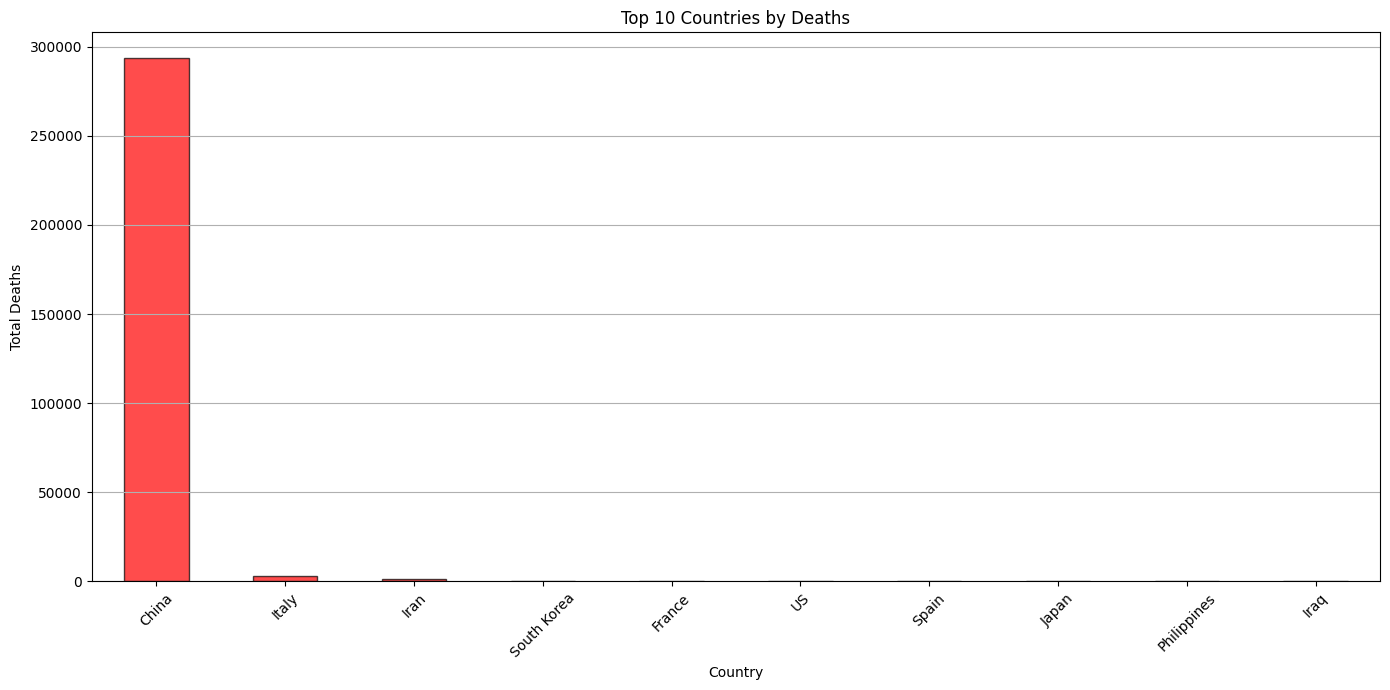

In [16]:


# Taking the top 10 countries based on deaths
top_countries_deaths = country_data.sort_values(by='deaths', ascending=False).head(10)

# Plotting bar plot for top countries based on deaths
plt.figure(figsize=(14, 7))
top_countries_deaths['deaths'].plot(kind='bar', color='red', edgecolor='black', alpha=0.7)
plt.title('Top 10 Countries by Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


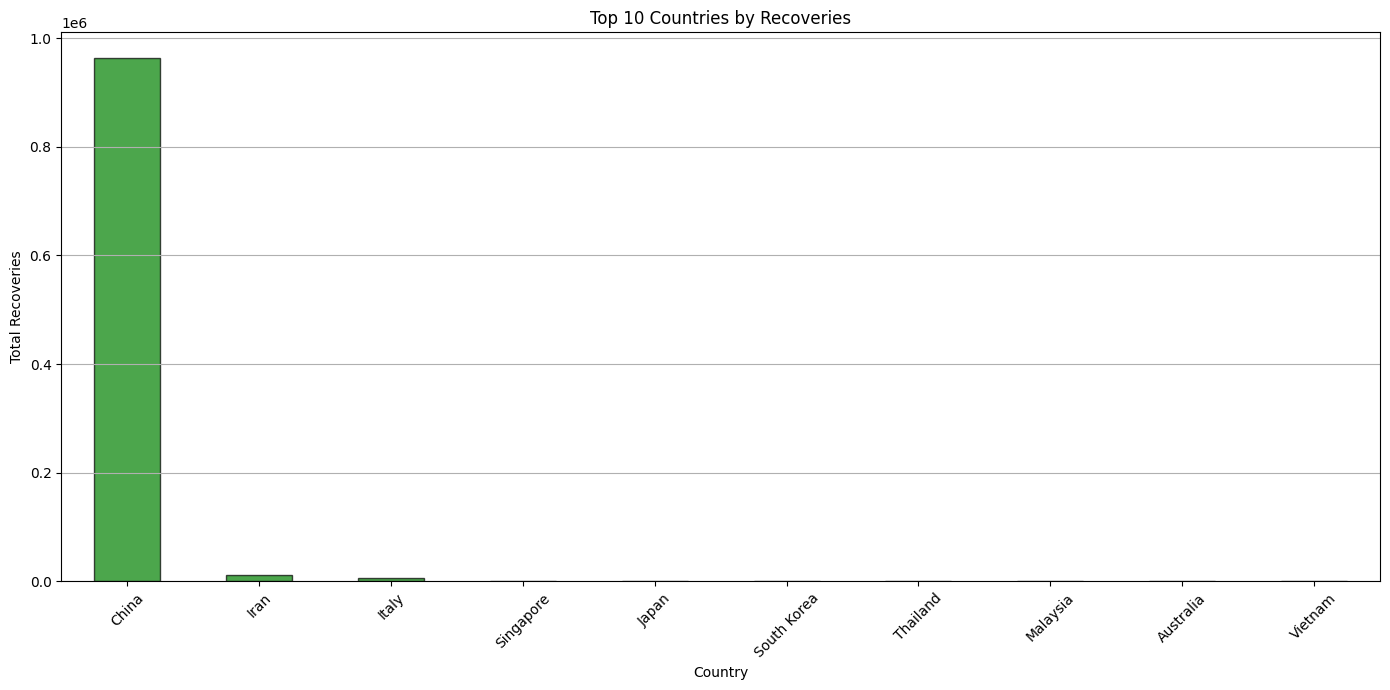

In [17]:
# Taking the top 10 countries based on recoveries
top_countries_recoveries = country_data.sort_values(by='recovered', ascending=False).head(10)

# Plotting bar plot for top countries based on recoveries
plt.figure(figsize=(14, 7))
top_countries_recoveries['recovered'].plot(kind='bar', color='green', edgecolor='black', alpha=0.7)
plt.title('Top 10 Countries by Recoveries')
plt.xlabel('Country')
plt.ylabel('Total Recoveries')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


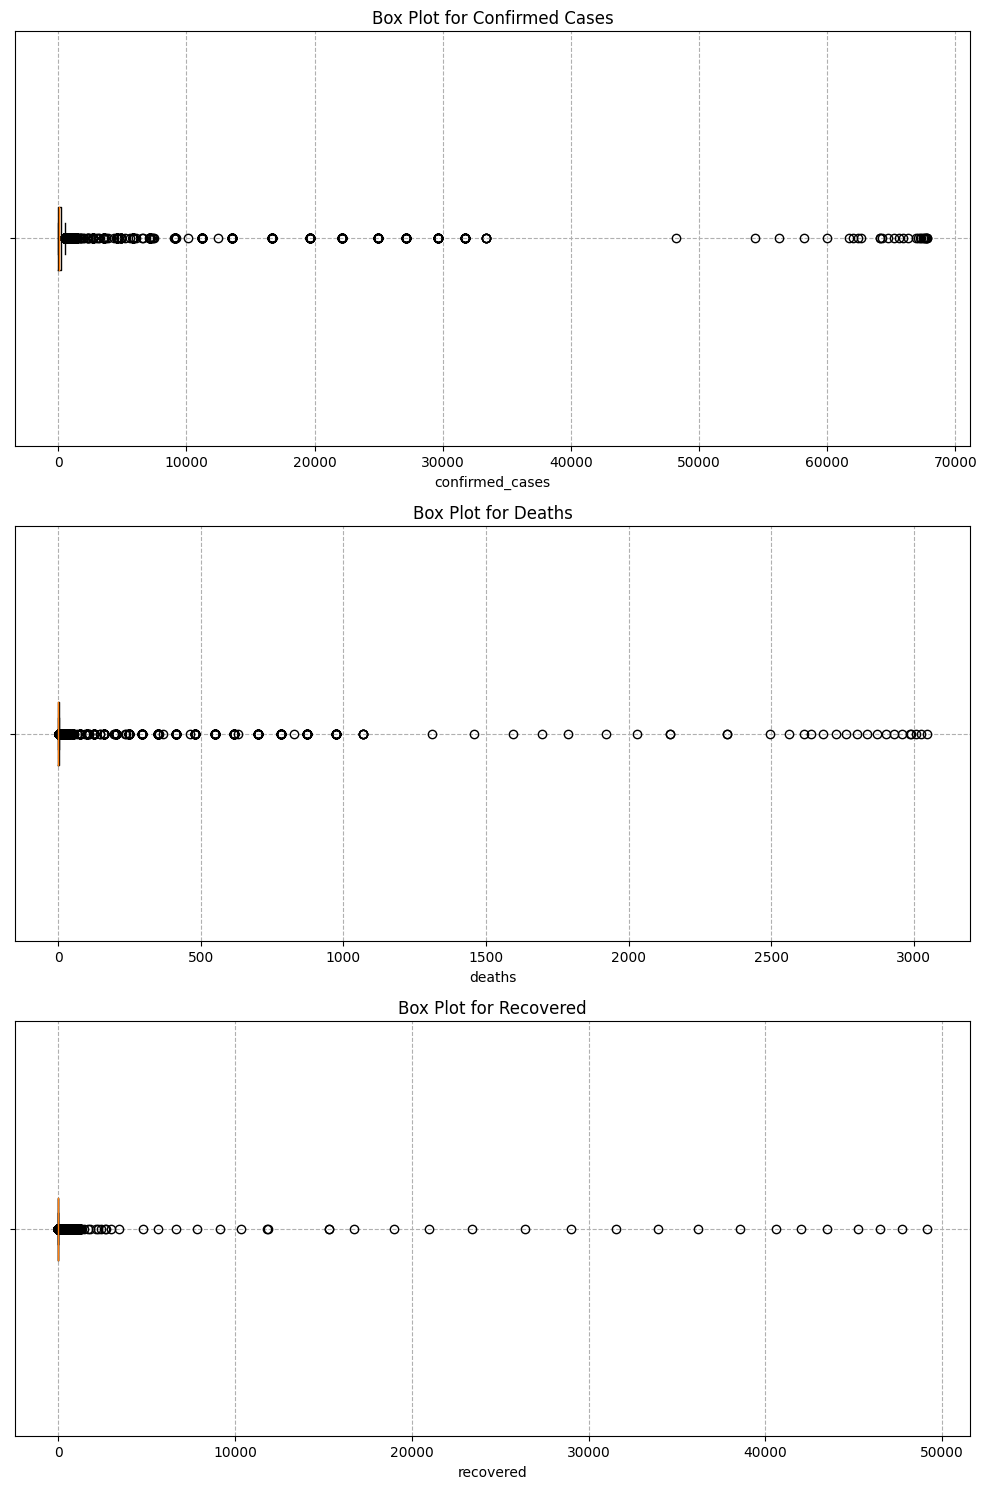

In [18]:
# Setting up the figure and axes
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Columns to plot
columns_to_plot = ['confirmed_cases', 'deaths', 'recovered']
titles = ['Box Plot for Confirmed Cases', 'Box Plot for Deaths', 'Box Plot for Recovered']

# Creating box plots
for i, column in enumerate(columns_to_plot):
    axs[i].boxplot(covid_data[column], vert=False)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(column)
    axs[i].set_yticklabels([])
    axs[i].grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()


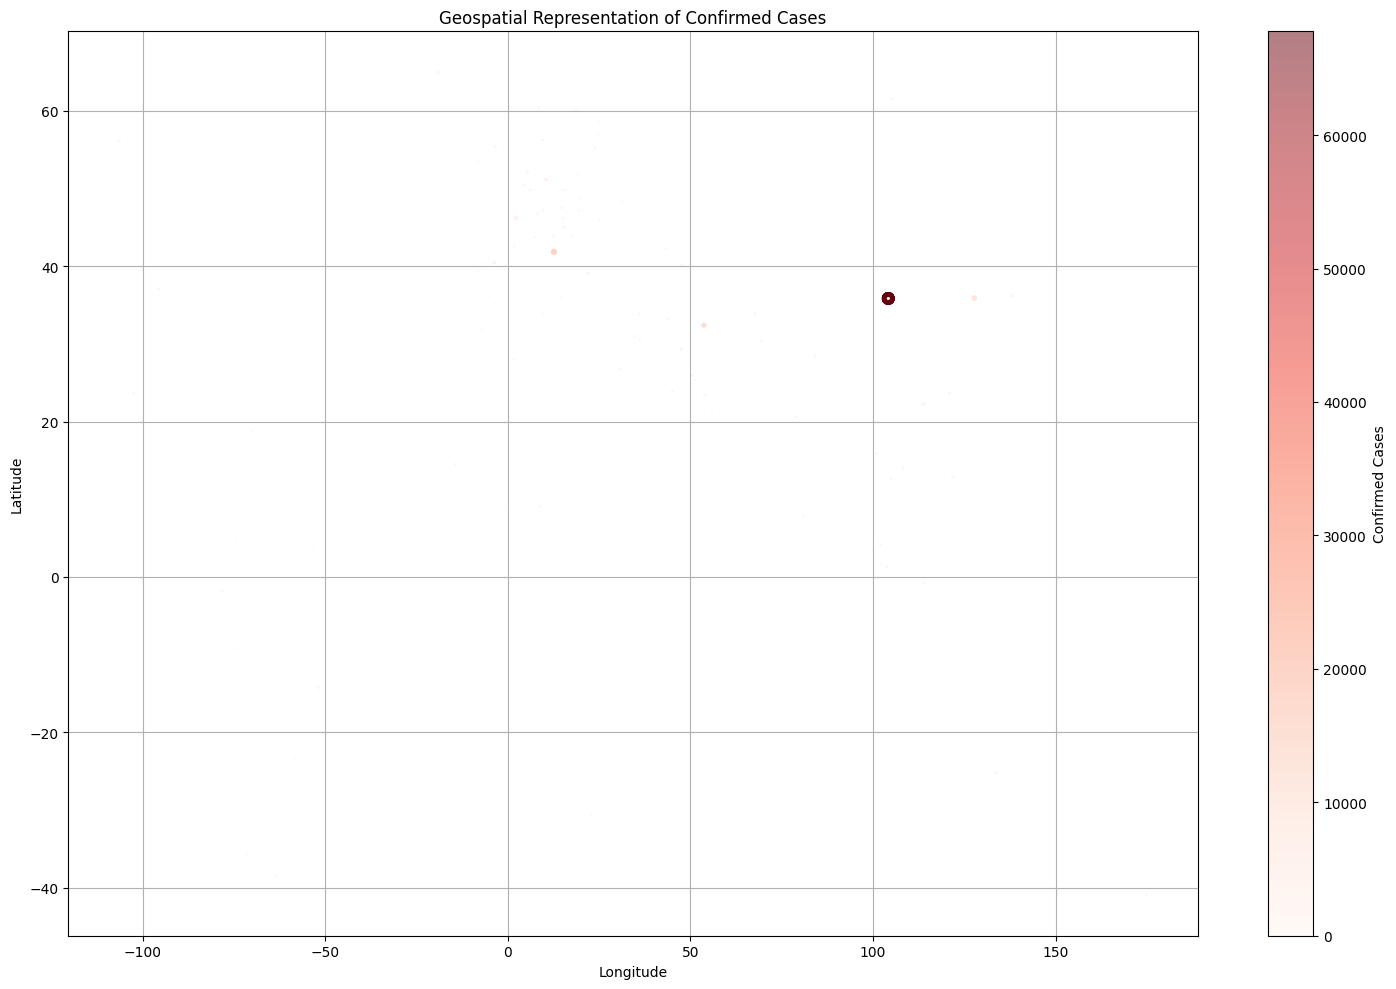

In [19]:
# Setting up the figure
plt.figure(figsize=(15, 10))

# Scatter plot for geospatial representation of confirmed cases
plt.scatter(covid_data['longitude'], covid_data['latitude'], c=covid_data['confirmed_cases'],
            cmap='Reds', s=covid_data['confirmed_cases']/1000, alpha=0.5)

# Adding colorbar and title
cbar = plt.colorbar()
cbar.set_label('Confirmed Cases')
plt.title('Geospatial Representation of Confirmed Cases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.tight_layout()
plt.show()


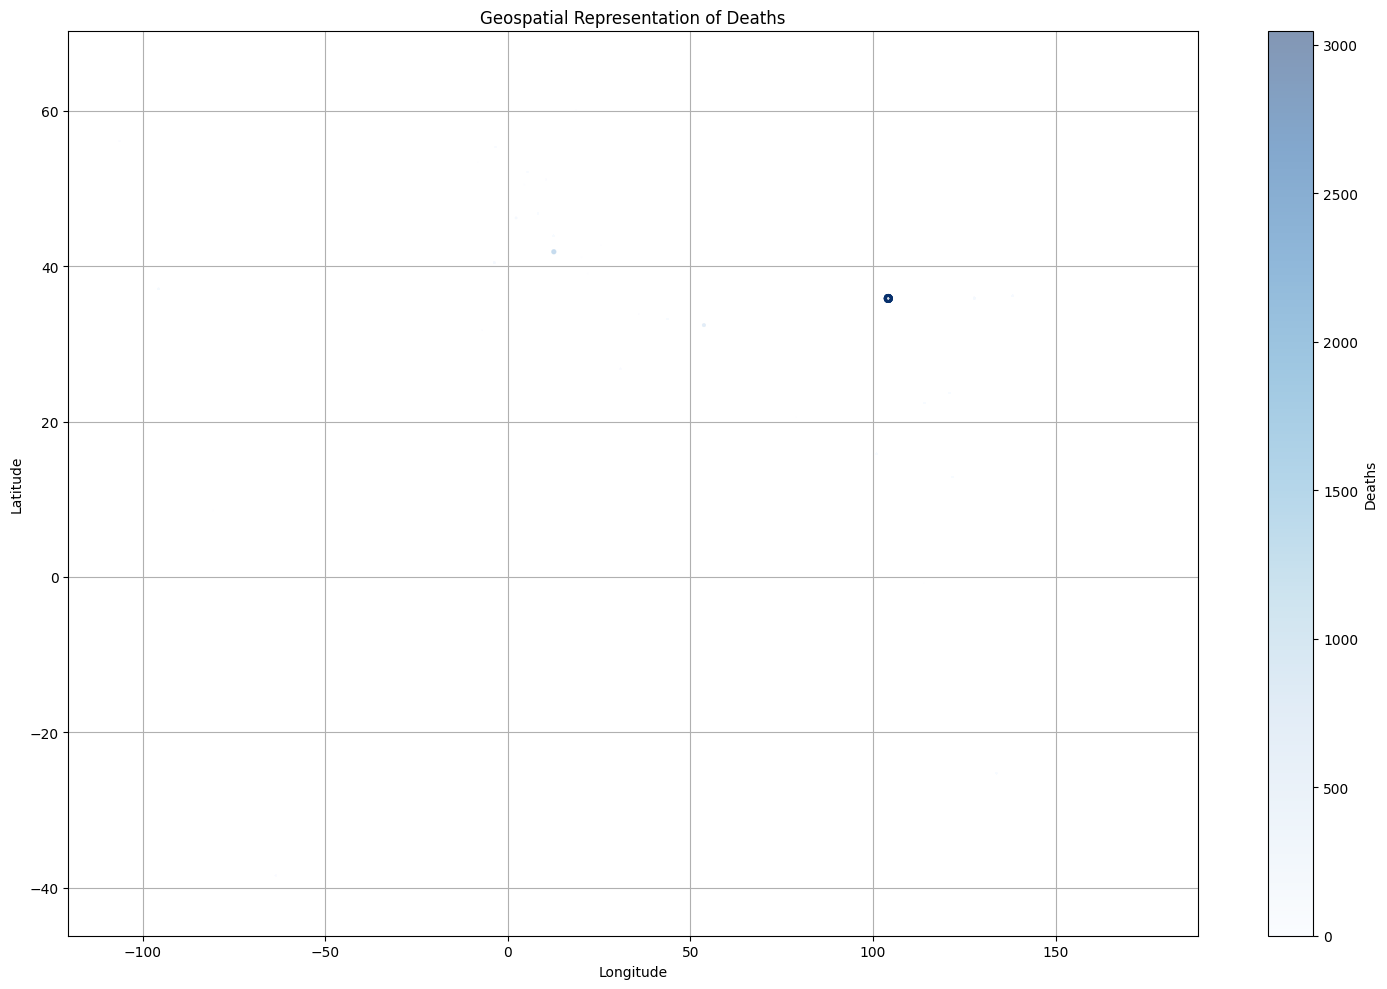

In [20]:
# Setting up the figure
plt.figure(figsize=(15, 10))

# Scatter plot for geospatial representation of deaths
plt.scatter(covid_data['longitude'], covid_data['latitude'], c=covid_data['deaths'],
            cmap='Blues', s=covid_data['deaths']/100, alpha=0.5)

# Adding colorbar and title
cbar = plt.colorbar()
cbar.set_label('Deaths')
plt.title('Geospatial Representation of Deaths')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.tight_layout()
plt.show()


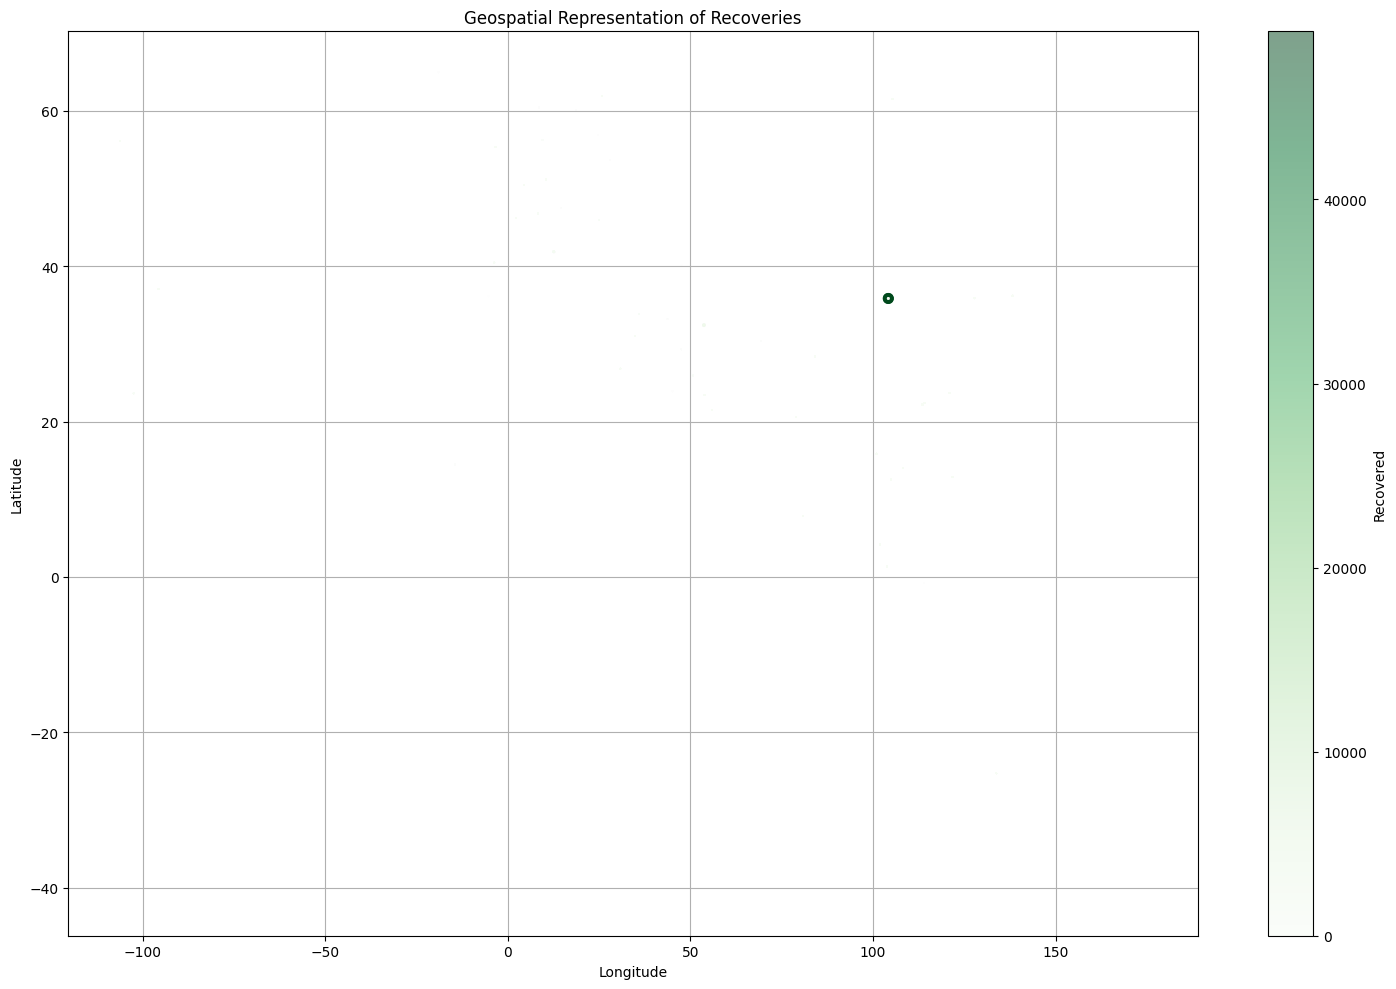

In [21]:
# Setting up the figure
plt.figure(figsize=(15, 10))

# Scatter plot for geospatial representation of recoveries
plt.scatter(covid_data['longitude'], covid_data['latitude'], c=covid_data['recovered'],
            cmap='Greens', s=covid_data['recovered']/1000, alpha=0.5)

# Adding colorbar and title
cbar = plt.colorbar()
cbar.set_label('Recovered')
plt.title('Geospatial Representation of Recoveries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.tight_layout()
plt.show()


In [24]:
# Converting 'update_time' to a datetime object
covid_data['update_time'] = covid_data['update_time'].astype('datetime64[ns]')

# Extracting year, month, and day from 'update_time'
covid_data['year'] = covid_data['update_time'].dt.year
covid_data['month'] = covid_data['update_time'].dt.month
covid_data['day'] = covid_data['update_time'].dt.day

# Displaying the first few rows to check the new columns
covid_data[['update_time', 'year', 'month', 'day']].head()


,update_time,year,month,day
0,2020-01-24 14:55:00,2020,1,24
1,2020-01-24 14:55:00,2020,1,24
2,2020-01-24 14:55:00,2020,1,24
3,2020-01-24 14:55:00,2020,1,24
4,2020-01-24 14:55:00,2020,1,24


In [25]:
# Creating aggregated features
aggregated_features = covid_data.groupby('country').agg({
    'confirmed_cases': 'sum',
    'deaths': 'sum',
    'recovered': 'sum'
}).reset_index()

# Renaming the columns
aggregated_features.columns = ['country', 'total_confirmed_cases', 'total_deaths', 'total_recoveries']

# Merging the aggregated features back to the main dataset
covid_data = pd.merge(covid_data, aggregated_features, on='country', how='left')

# Displaying the first few rows to check the new columns
covid_data[['country', 'total_confirmed_cases', 'total_deaths', 'total_recoveries']].head()


,country,total_confirmed_cases,total_deaths,total_recoveries
0,China,12255743,293369.0,962320.0
1,China,12255743,293369.0,962320.0
2,China,12255743,293369.0,962320.0
3,China,12255743,293369.0,962320.0
4,China,12255743,293369.0,962320.0


In [26]:
# Creating local ratio features
covid_data['local_death_ratio'] = covid_data['deaths'] / covid_data['confirmed_cases']
covid_data['local_recovery_ratio'] = covid_data['recovered'] / covid_data['confirmed_cases']

# Creating aggregated ratio features
covid_data['aggregated_death_ratio'] = covid_data['total_deaths'] / covid_data['total_confirmed_cases']
covid_data['aggregated_recovery_ratio'] = covid_data['total_recoveries'] / covid_data['total_confirmed_cases']

# Displaying the first few rows to check the new columns
covid_data[['country', 'local_death_ratio', 'local_recovery_ratio', 'aggregated_death_ratio', 'aggregated_recovery_ratio']].head()


,country,local_death_ratio,local_recovery_ratio,aggregated_death_ratio,aggregated_recovery_ratio
0,China,0.053498,0.0,0.023937,0.07852
1,China,0.000000,0.0,0.023937,0.07852
2,China,0.000000,0.0,0.023937,0.07852
3,China,0.000000,0.0,0.023937,0.07852
4,China,0.000000,0.0,0.023937,0.07852


In [27]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize
columns_to_standardize = ['confirmed_cases', 'deaths', 'recovered',
                          'local_death_ratio', 'local_recovery_ratio',
                          'aggregated_death_ratio', 'aggregated_recovery_ratio']

# Initializing the StandardScaler
scaler = StandardScaler()

# Applying the scaler to the relevant columns
covid_data[columns_to_standardize] = scaler.fit_transform(covid_data[columns_to_standardize])

# Displaying the first few rows to check the standardized values
covid_data[['country'] + columns_to_standardize].head()


,country,confirmed_cases,deaths,recovered,local_death_ratio,local_recovery_ratio,aggregated_death_ratio,aggregated_recovery_ratio
0,China,0.069380,0.240912,-0.040927,0.321755,-0.26077,0.098196,-0.111067
1,China,-0.141322,-0.108689,-0.040927,-0.053078,-0.26077,0.098196,-0.111067
2,China,-0.144439,-0.108689,-0.040927,-0.053078,-0.26077,0.098196,-0.111067
3,China,-0.146621,-0.108689,-0.040927,-0.053078,-0.26077,0.098196,-0.111067
4,China,-0.149426,-0.108689,-0.040927,-0.053078,-0.26077,0.098196,-0.111067


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

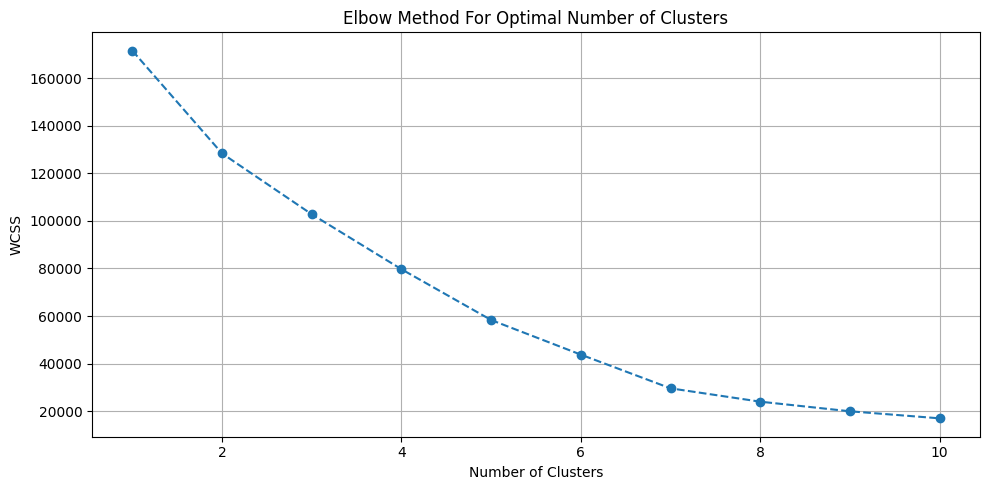

In [29]:
from sklearn.cluster import KMeans
import numpy as np

# Extracting the features for clustering
X_clustering = covid_data[columns_to_standardize]

# Drop samples with missing values
X_clustering = X_clustering.dropna()

# Finding the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_clustering)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 29.9 MB/s eta 0:00:00


In [39]:
import sweetviz as sv
import pandas as pd

                                             |          | [  0%]   00:00 -> (? left)


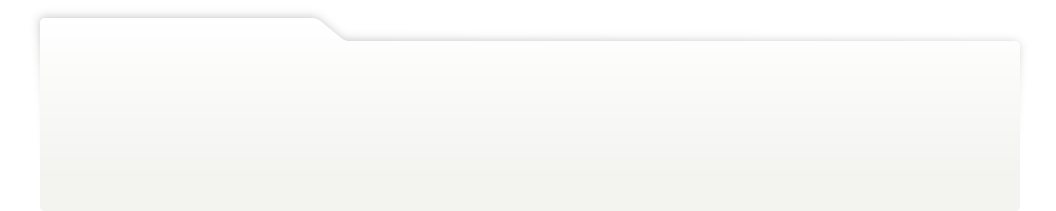
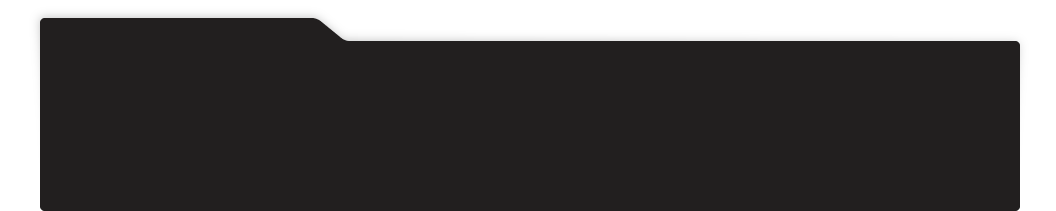
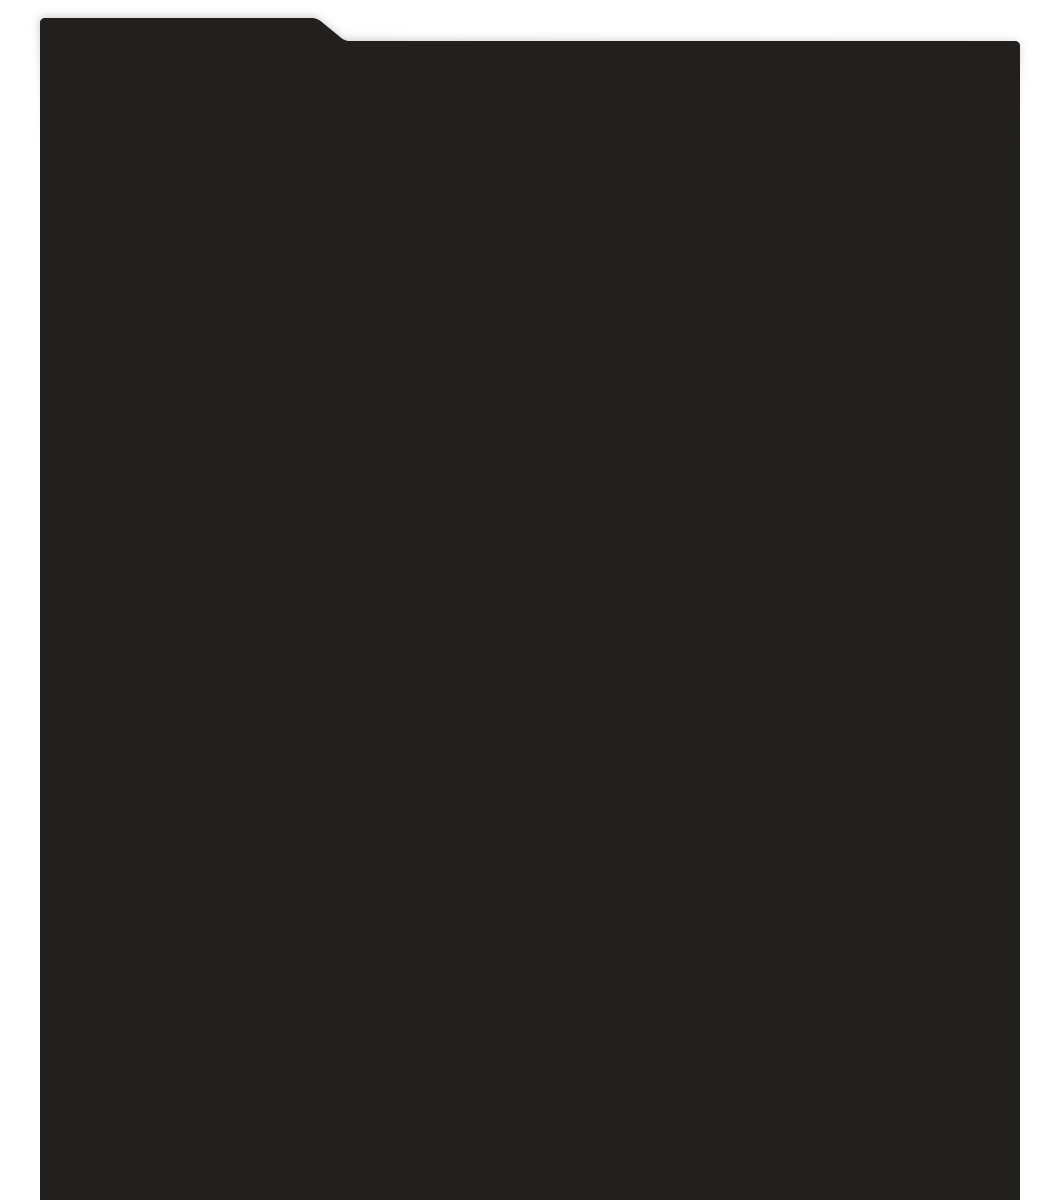
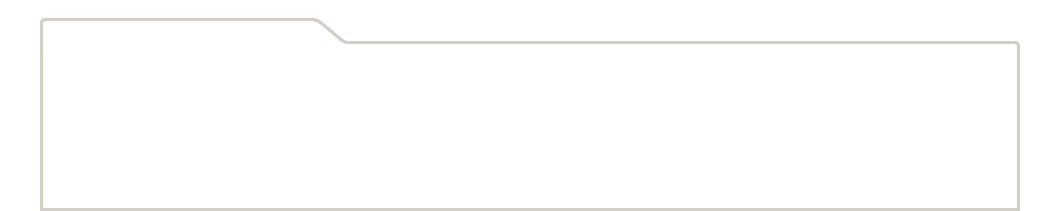
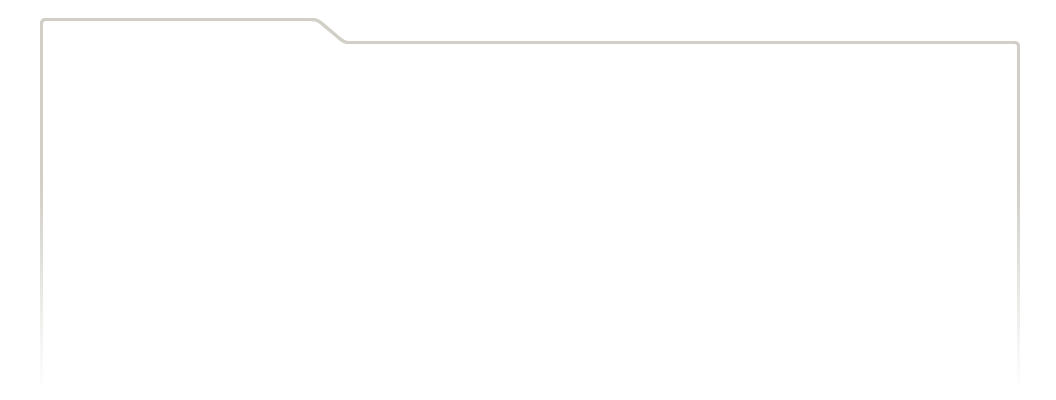
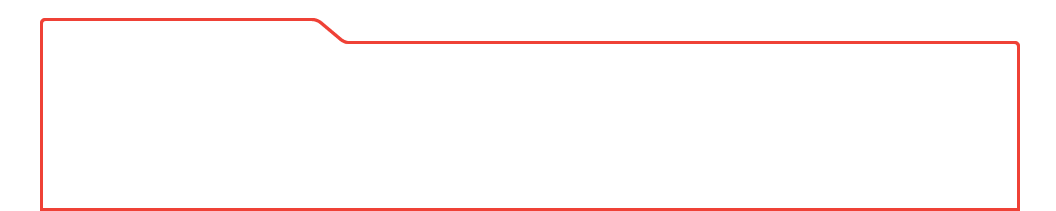
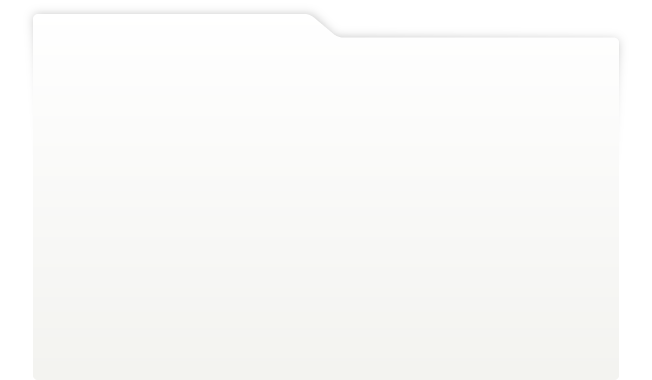
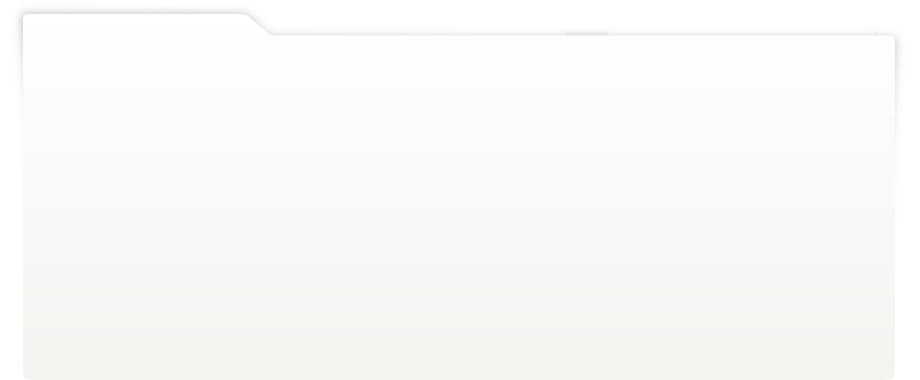
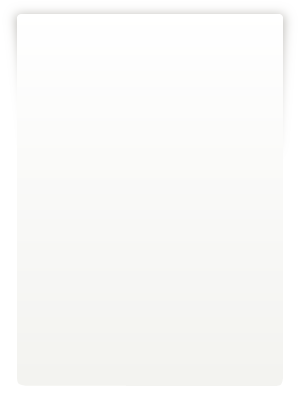
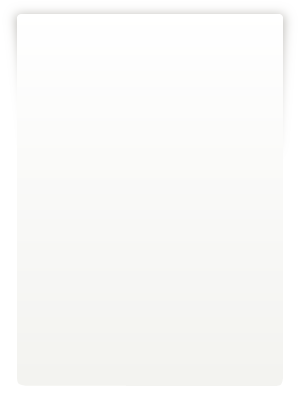
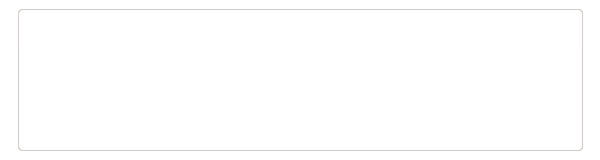
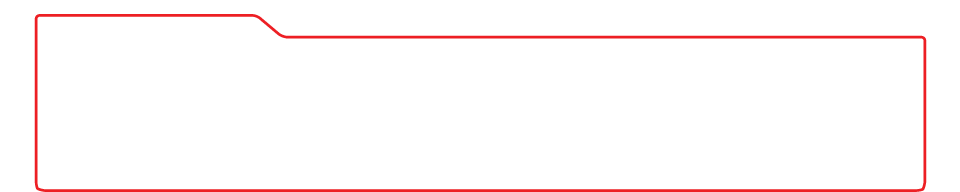
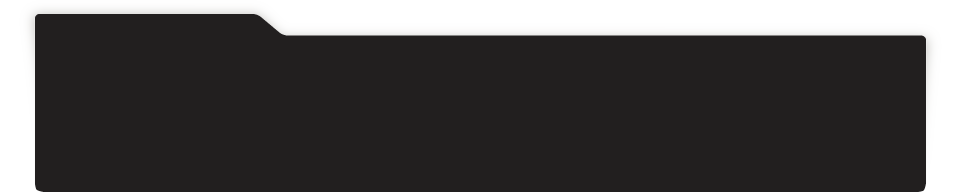
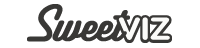
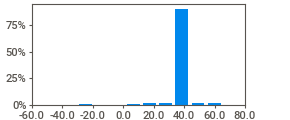
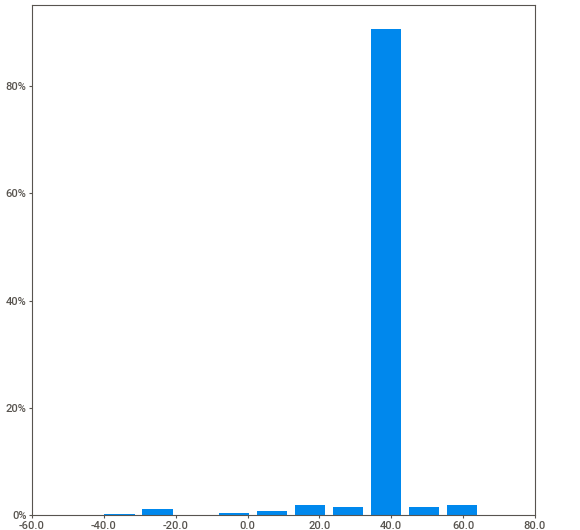
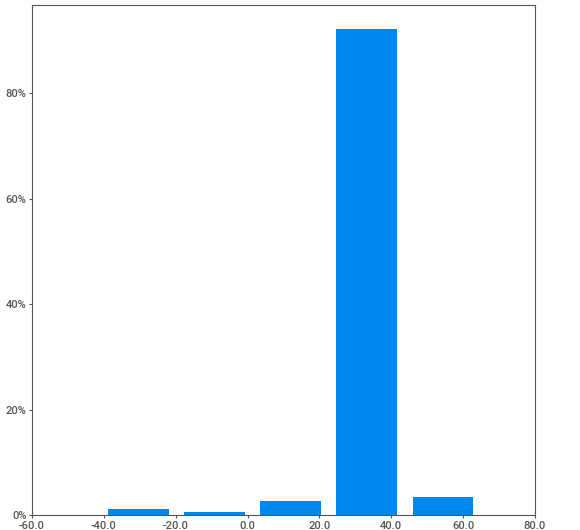
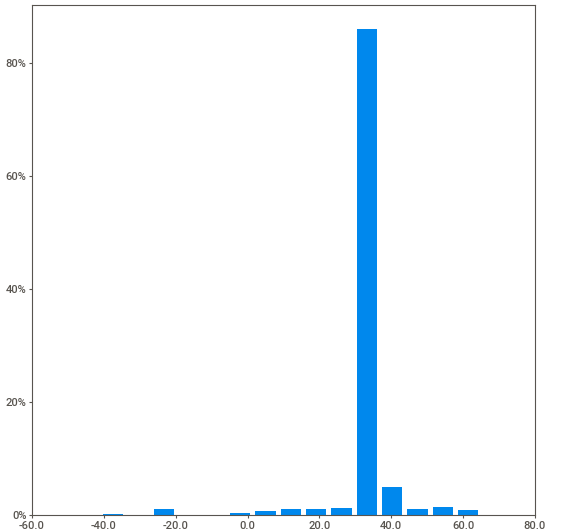
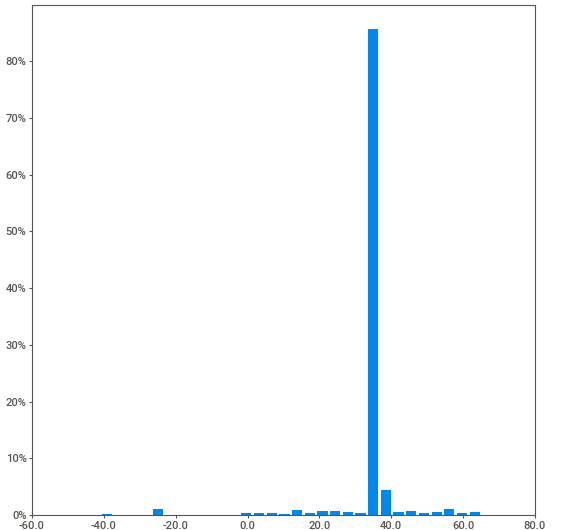
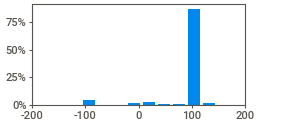
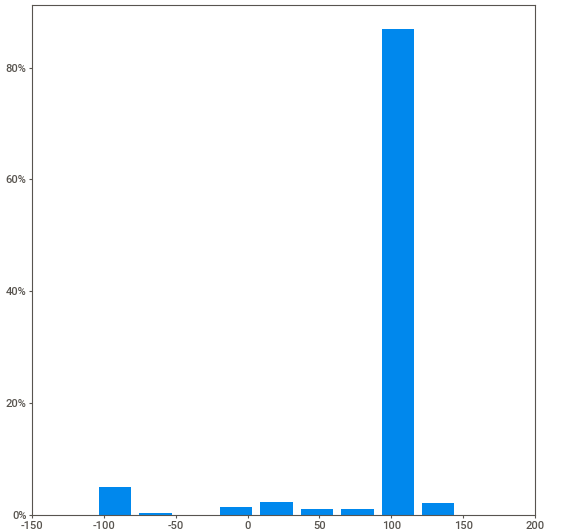
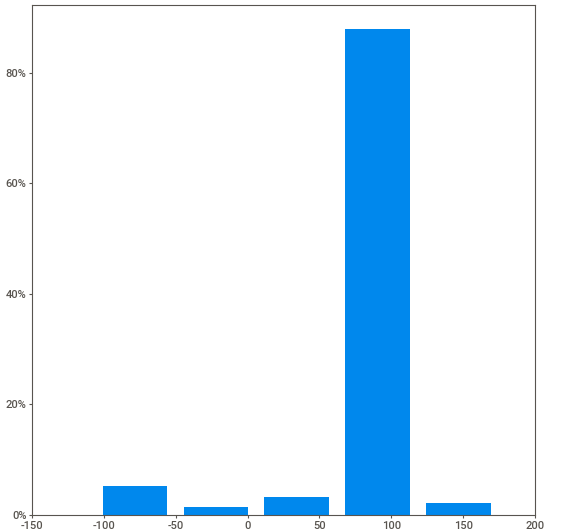
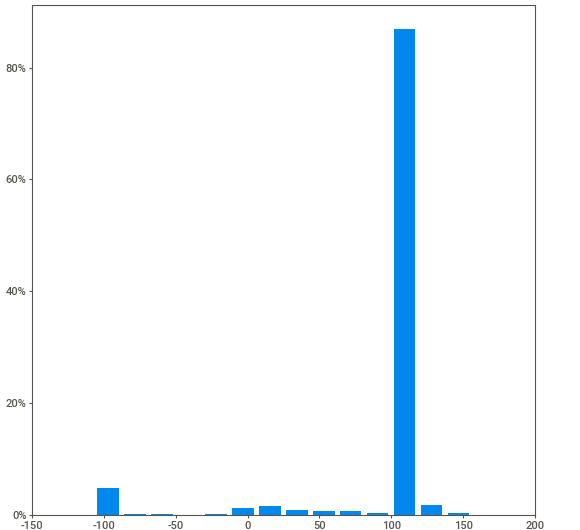
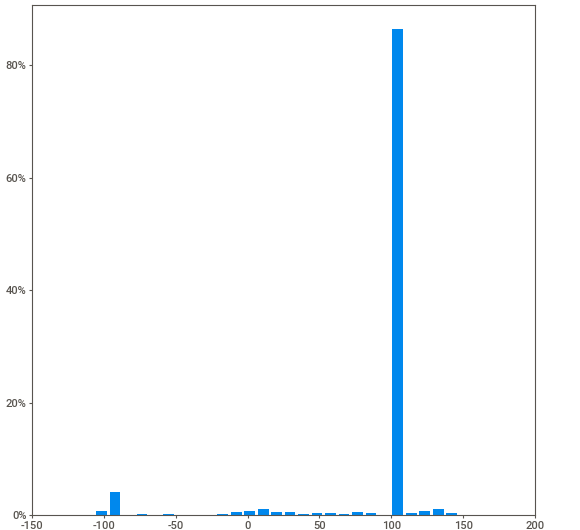
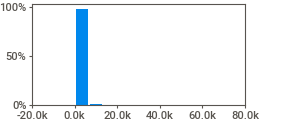
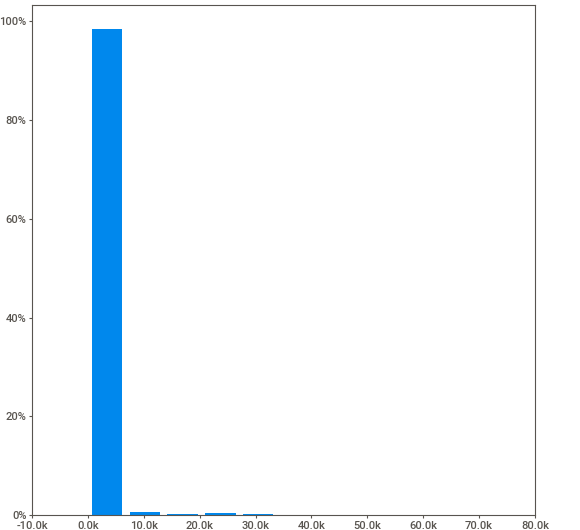
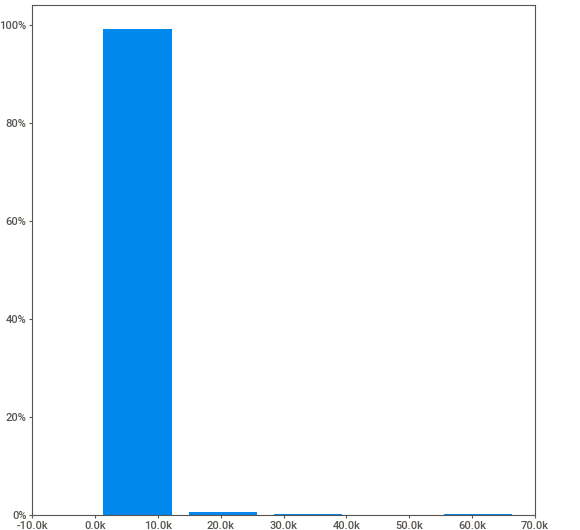
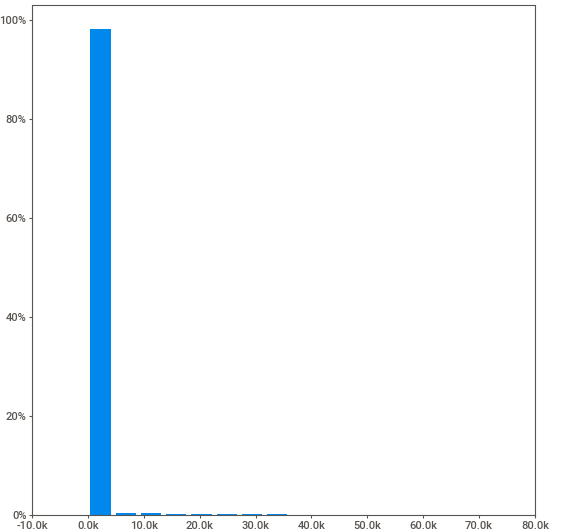
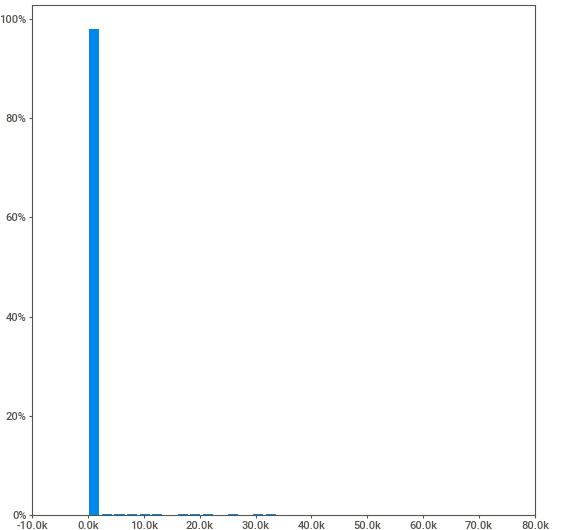
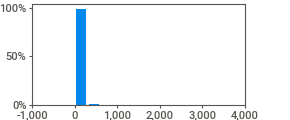
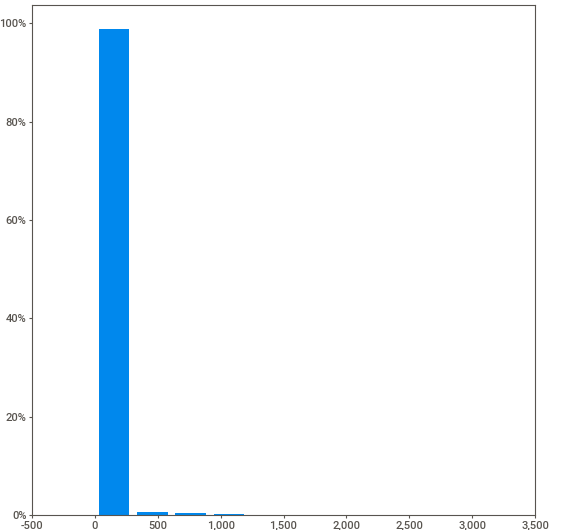
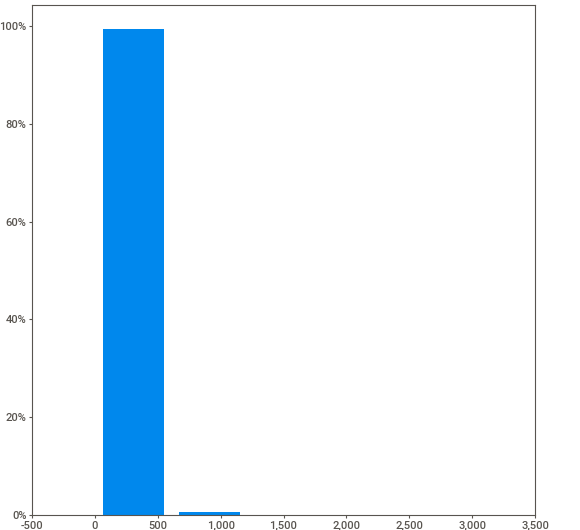
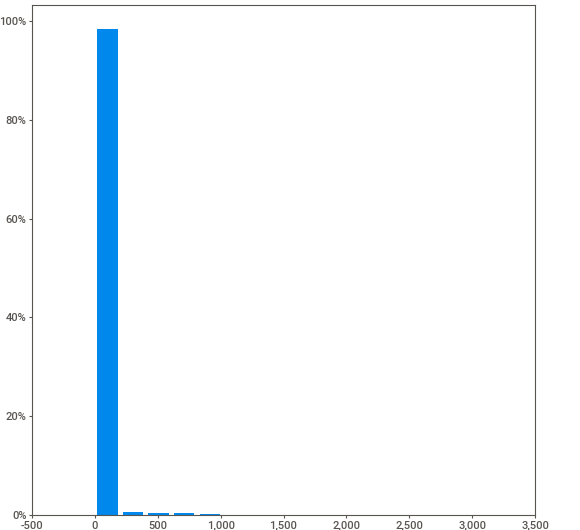
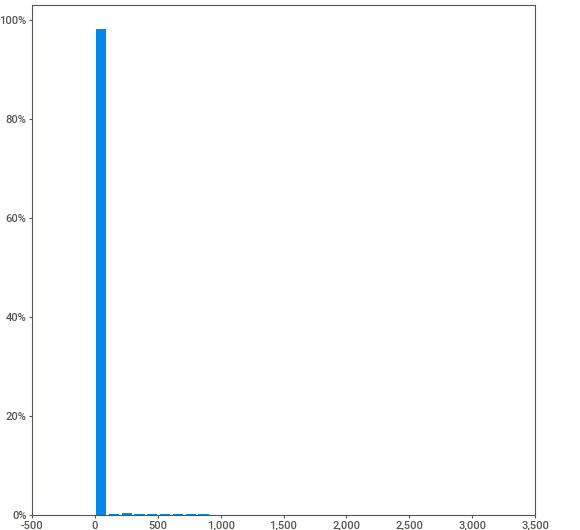
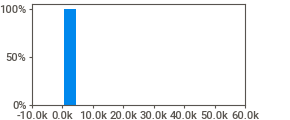
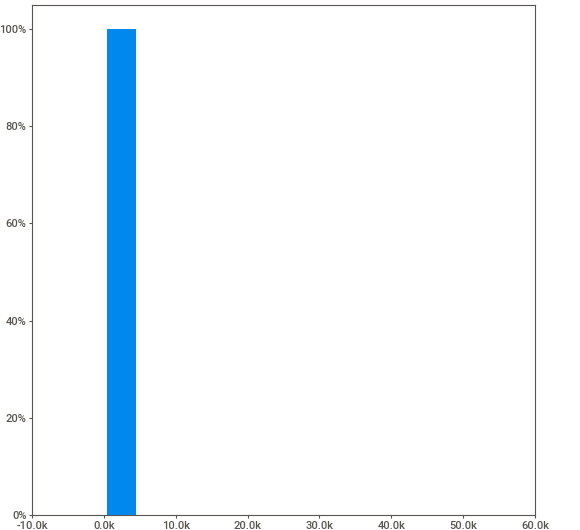
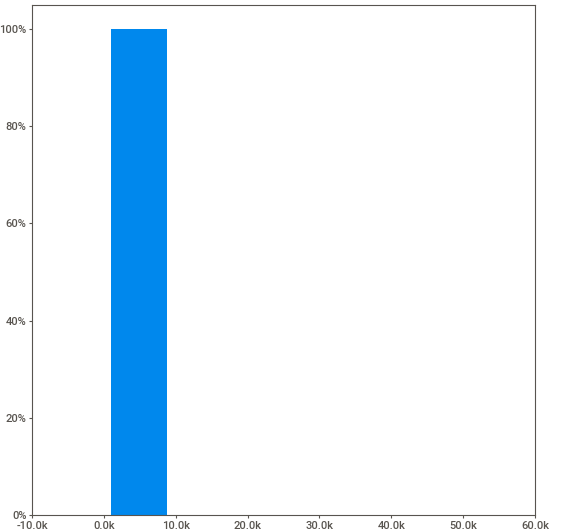
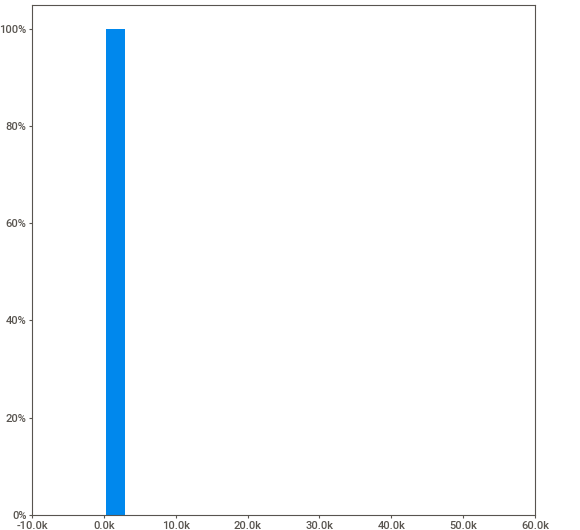
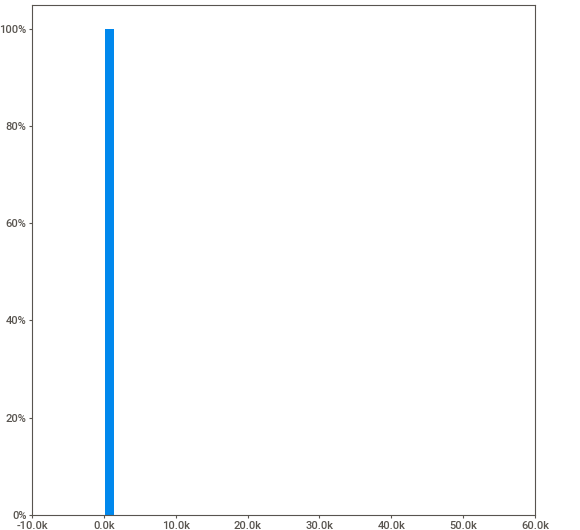
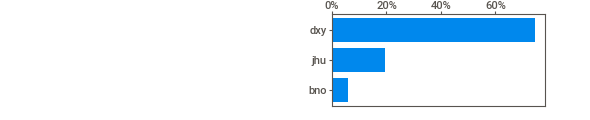
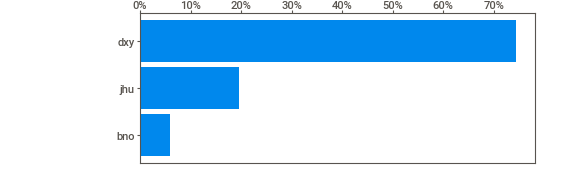
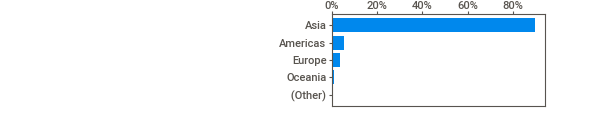
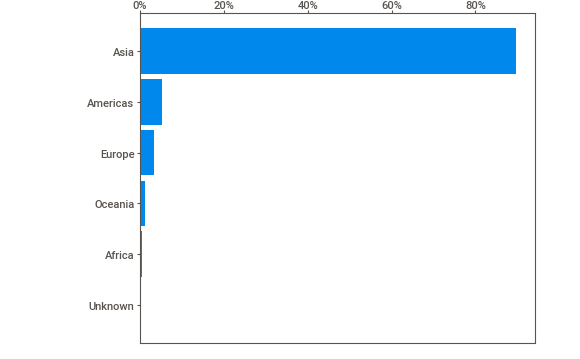
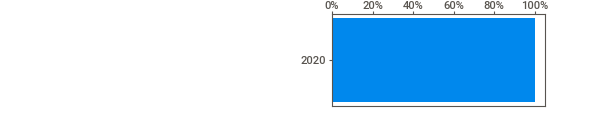
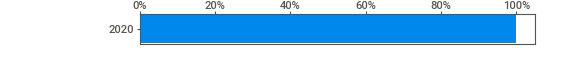
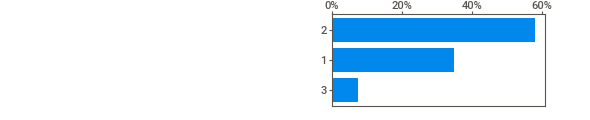
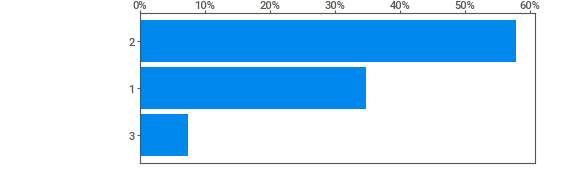
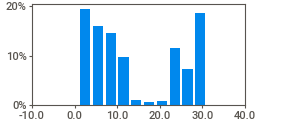
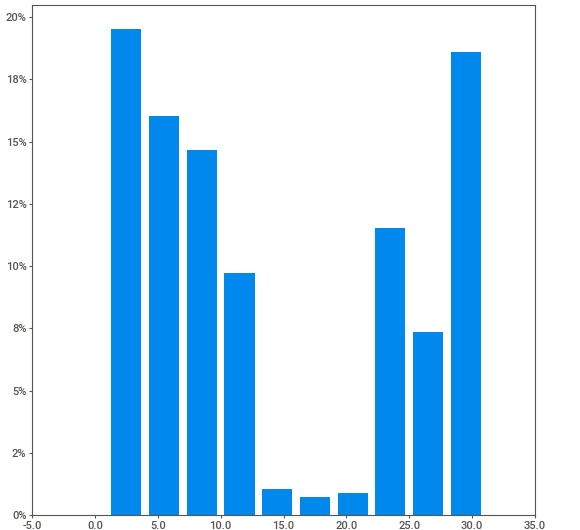
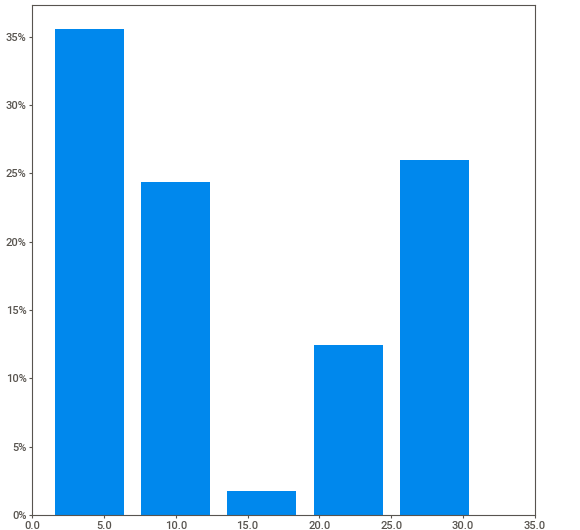
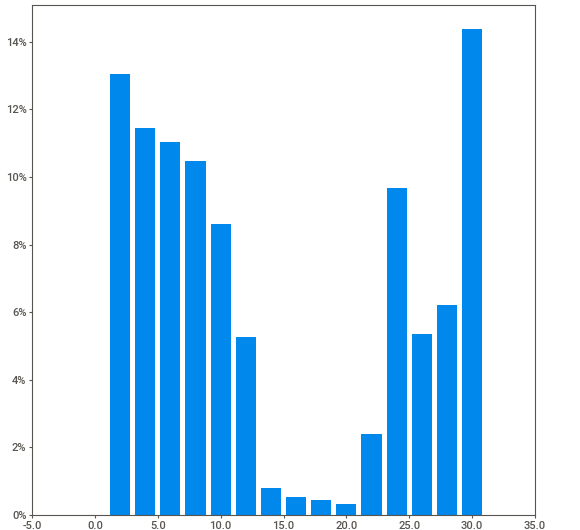
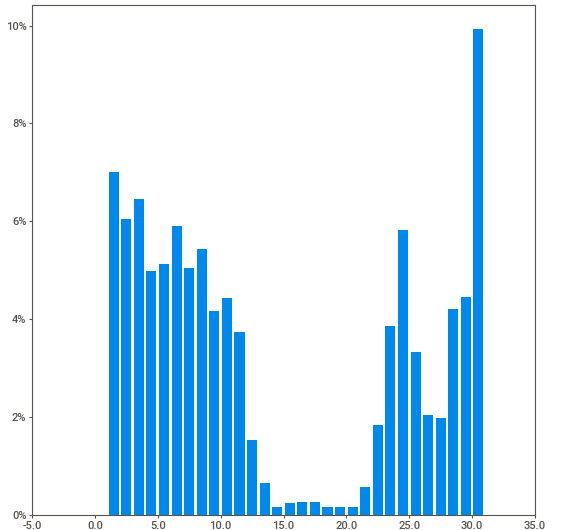
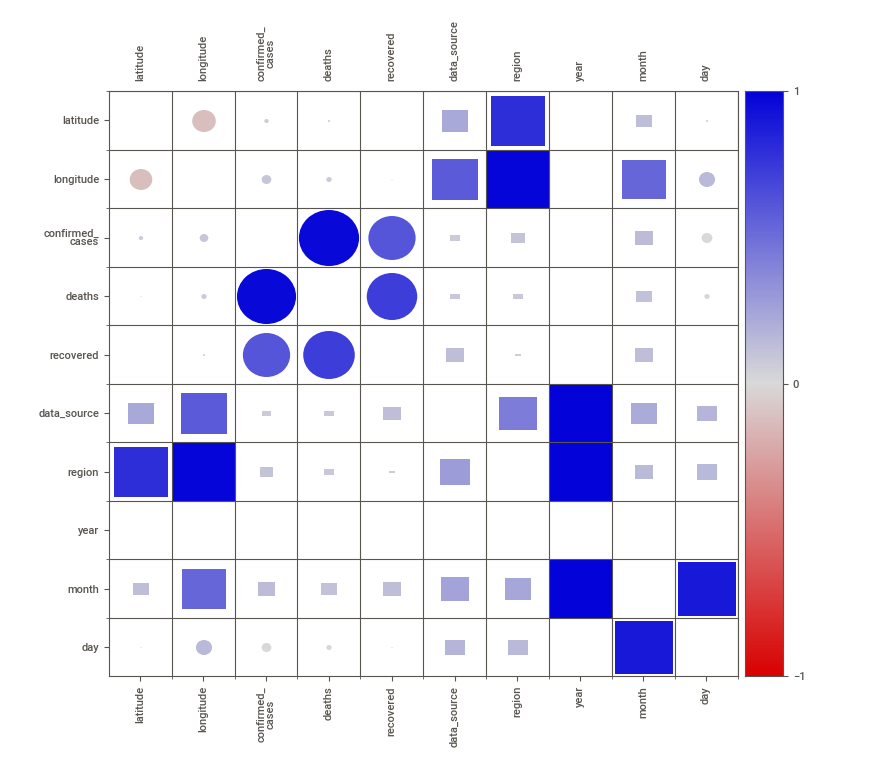
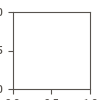

In [40]:
report = sv.analyze(data)
report.show_notebook()